# Explore the Data

https://www.kaggle.com/jiashenliu/515k-hotel-reviews-data-in-europe

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

In [9]:
all_reviews = pd.read_csv('Hotel_Reviews.csv')

In [4]:
all_reviews.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


## About the Hotels

- 1,492 hotels were reviewd in this dataset
- The hotels are located in the UK, Spain, France, Netherlands, Italy and Austria

In [5]:
all_reviews['Hotel_Name'].value_counts()

Britannia International Hotel Canary Wharf           4789
Strand Palace Hotel                                  4256
Park Plaza Westminster Bridge London                 4169
Copthorne Tara Hotel London Kensington               3578
DoubleTree by Hilton Hotel London Tower of London    3212
                                                     ... 
Hotel Daniel Paris                                     12
Hotel Eitlj rg                                         12
Hotel Wagner                                           10
Mercure Paris Porte d Orleans                          10
Hotel Gallitzinberg                                     8
Name: Hotel_Name, Length: 1492, dtype: int64

In [11]:
all_reviews.Hotel_Address = all_reviews.Hotel_Address.str.replace('United Kingdom','UK')
all_reviews['Country'] = all_reviews.Hotel_Address.apply(lambda x: x.split(' ')[-1])

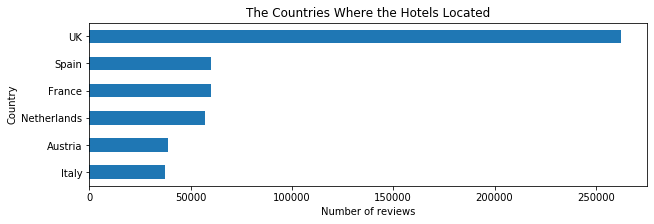

In [17]:
plt.figure(figsize = (10, 3))
plt.xlabel('Number of reviews')
plt.ylabel('Country')
plt.title('The Countries Where the Hotels Located')
all_reviews.Country.value_counts().plot.barh().invert_yaxis()

- Let's define the popular hotels are above 8 Avg_score and with the most reviews.

In [16]:
all_reviews[all_reviews.Average_Score >= 8][['Hotel_Name','Average_Score','Total_Number_of_Reviews']].drop_duplicates().sort_values(by ='Total_Number_of_Reviews', ascending = False)[:10]

,Hotel_Name,Average_Score,Total_Number_of_Reviews
488409,Hotel Da Vinci,8.1,16670
504027,Park Plaza Westminster Bridge London,8.7,12158
496065,Hotel degli Arcimboldi,8.3,10842
164259,Strand Palace Hotel,8.1,9568
311000,Best Western Premier Hotel Couture,8.7,8177
509232,The Student Hotel Amsterdam City,8.7,7656
379680,Golden Tulip Amsterdam West,8.5,7586
236055,DoubleTree by Hilton Hotel London Tower of London,8.7,7491
404728,Glam Milano,8.8,7371
309843,Jaz Amsterdam,8.9,7108


## Where are the reviewers from?

- The reviews were written by people from 227 different countries
- Nearly half of the reviewers are from the United Kingdom, others are from the USA, Australia, Ireland, UAE, etc.
- 70% of the reviews are from top 10 countries

In [25]:
all_reviews['Reviewer_Nationality'].value_counts(normalize=True)

 United Kingdom               0.475524
 United States of America     0.068711
 Australia                    0.042048
 Ireland                      0.028749
 United Arab Emirates         0.019845
                                ...   
 Tuvalu                       0.000002
 Anguilla                     0.000002
 Vatican City                 0.000002
 Svalbard Jan Mayen           0.000002
 Comoros                      0.000002
Name: Reviewer_Nationality, Length: 227, dtype: float64

Text(0.5, 1.0, 'The Nationality of Reviewers')

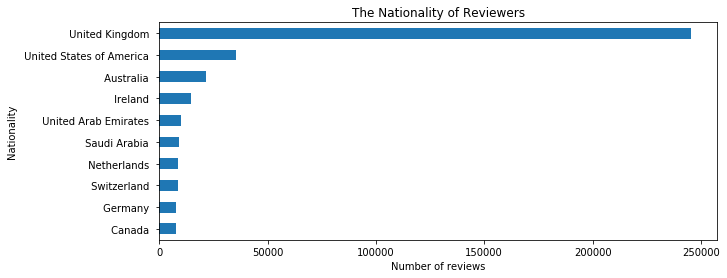

In [126]:
all_reviews['Reviewer_Nationality'].value_counts().head(10).plot(kind='barh', figsize=(10, 4)).invert_yaxis()
plt.xlabel('Number of reviews')
plt.ylabel('Nationality')
plt.title('The Nationality of Reviewers')

## When was the review been published?

- The reviews were collected in two years from 2015-08-04 to 2017-08-03

In [37]:
review_date = pd.to_datetime(all_reviews['Review_Date'])
counted_review_date = review_date.value_counts().sort_index()

In [39]:
counted_review_date

2015-08-04    1347
2015-08-05     422
2015-08-06     798
2015-08-07     345
2015-08-08     574
              ... 
2017-07-30     568
2017-07-31     730
2017-08-01     638
2017-08-02    2585
2017-08-03     855
Name: Review_Date, Length: 731, dtype: int64

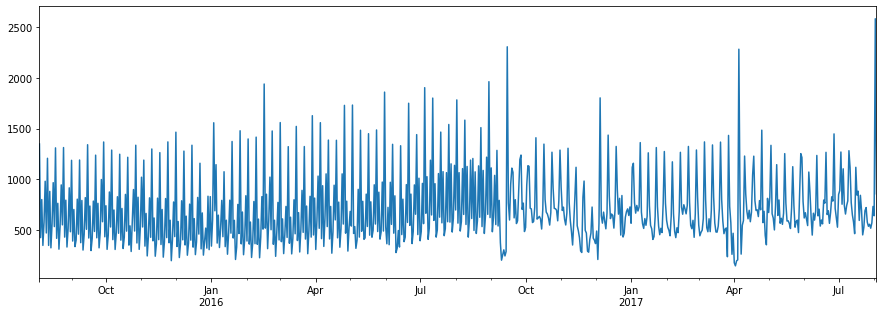

In [38]:
counted_review_date.plot(kind='line', figsize=(15,5))

## About the Review Content

- In average, the length (word count) of negative reviews (18.5) is longer than that of positive reviews (17.8)
- 95% of reviews have a score higher than 5.0

### Definition of positive score reviews and negative score reviews
- Let's define positive score reviews are above 5 Reviewer_Score, otherwise a negative score review.

In [52]:
pos_score_review = all_reviews[all_reviews.Reviewer_Score >= 5.0]
neg_score_review = all_reviews[all_reviews.Reviewer_Score < 5.0]

In [53]:
# number of positive and negative reviews
pos_review_cnt = pos_score_review['Reviewer_Score'].count()
neg_review_cnt = neg_score_review['Reviewer_Score'].count()
all_review_with_score_cnt = all_reviews['Reviewer_Score'].count()

- There are `493,457` of reviews with Reviewer_Score >= 5.0 `(95.68 %)`
- There are `22,281` of reviews with Reviewer_Score < 5.0 `(4.32 %)`

(-1.1081898616153294,
 1.1003899956298495,
 -1.1073838554565465,
 1.106863580463423)

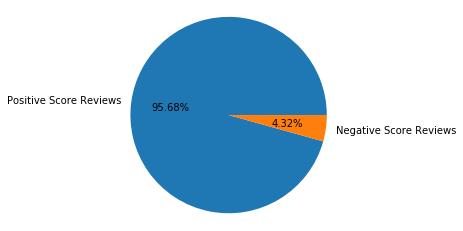

In [55]:
plt.pie([pos_review_cnt, neg_review_cnt], 
        labels = ['Positive Score Reviews', 'Negative Score Reviews'],
        autopct = '%1.2f%%')
plt.axis('equal')

### Average word counts

- The average word counts in 'Positive_Review' is `17.78`
- The average word counts in 'Negative_Review' is `18.54`

In [73]:
avg_pos_review_word = round(all_reviews['Review_Total_Positive_Word_Counts'].mean(), 2)
avg_neg_review_word = round(all_reviews['Review_Total_Negative_Word_Counts'].mean(), 2)
avg_pos_review_word, avg_neg_review_word

(17.78, 18.54)

- The average word counts in 'Positive_Review' of reviews with positive score (Review_Score >= 5) is `18.23`
- The average word counts in 'Negative_Review' of reviews with positive score (Review_Score >= 5) is `17.22`

In [75]:
avg_pos_score_review_pos_word = round(pos_score_review['Review_Total_Positive_Word_Counts'].mean(), 2)
avg_pos_score_review_neg_word = round(pos_score_review['Review_Total_Negative_Word_Counts'].mean(), 2)
avg_pos_score_review_pos_word, avg_pos_score_review_neg_word

(18.23, 17.22)

- The average word counts in 'Positive_Review' of reviews with negative score (Review_Score < 5) is `7.68`
- The average word counts in 'Negative_Review' of reviews with negative score (Review_Score < 5) is `47.81`

In [74]:
avg_neg_score_review_pos_word = round(neg_score_review['Review_Total_Positive_Word_Counts'].mean(), 2)
avg_neg_score_review_neg_word = round(neg_score_review['Review_Total_Negative_Word_Counts'].mean(), 2)
avg_neg_score_review_pos_word, avg_neg_score_review_neg_word

(7.68, 47.81)

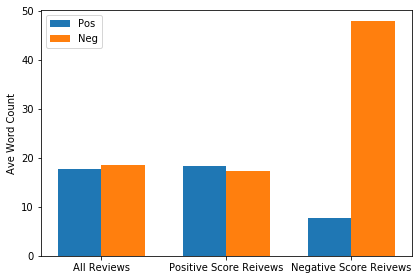

In [84]:
labels = ['All Reviews', 'Positive Score Reivews', 'Negative Score Reivews']
pos_word_cnt = [avg_pos_review_word, avg_pos_score_review_pos_word, avg_neg_score_review_pos_word]
neg_word_cnt = [avg_neg_review_word, avg_pos_score_review_neg_word, avg_neg_score_review_neg_word]

fig, ax = plt.subplots()
ax.bar(x - width/2, pos_word_cnt, width, label='Pos')
ax.bar(x + width/2, neg_word_cnt, width, label='Neg')

ax.set_ylabel('Ave Word Count')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

### The averge score 

Text(0, 0.5, 'Number of reviews')

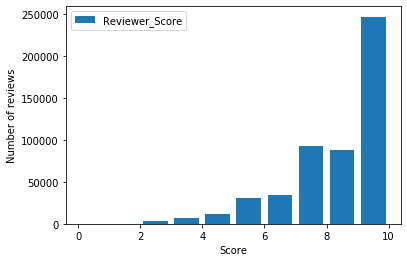

In [26]:
all_reviews[['Reviewer_Score']].plot(kind='hist',bins=list(range(11)), rwidth=0.8)
plt.xlabel('Score')
plt.ylabel('Number of reviews')

In [85]:
avg_score = round(all_reviews['Reviewer_Score'].mean(), 2)
avg_pos_score = round(pos_score_review['Reviewer_Score'].mean(), 2)
avg_neg_score = round(neg_score_review['Reviewer_Score'].mean(), 2)
avg_score, avg_pos_score, avg_neg_score

(8.4, 8.6, 3.86)

- The overall average score is `8.4`
- For positive score reviews (`Reviewer_Score >= 5.0`), the average score is `8.6`
- For negative score reviews (`Reviewer_Score < 5.0`), the average score is `3.86`

## Other Facts

- The most popular tag is "Leisure trip"

In [39]:
from collections import Counter

In [46]:
tags = []
for tag_list in all_reviews.Tags.apply(lambda x: x[1:-1].replace('\'', '').split(',')):
    for tag in tag_list:
        tags.append(tag.strip())

In [47]:
Counter(tags).most_common(10)

[('Leisure trip', 417778),
 ('Submitted from a mobile device', 307640),
 ('Couple', 252294),
 ('Stayed 1 night', 193645),
 ('Stayed 2 nights', 133937),
 ('Solo traveler', 108545),
 ('Stayed 3 nights', 95821),
 ('Business trip', 82939),
 ('Group', 65392),
 ('Family with young children', 61015)]